# Исследовательский анализ данных

**Описание данных**

- *Name — название игры*
- *Platform — платформа*
- *Year_of_Release — год выпуска*
- *Genre — жанр игры*
- *NA_sales — продажи в Северной Америке (миллионы проданных копий)*
- *EU_sales — продажи в Европе (миллионы проданных копий)*
- *JP_sales — продажи в Японии (миллионы проданных копий)*
- *Other_sales — продажи в других странах (миллионы проданных копий)*
- *Critic_Score — оценка критиков (максимум 100)*
- *User_Score — оценка пользователей (максимум 10)*
- *Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.*


*Данные за 2016 год могут быть неполными.*

----

**Ход исследования**

Проведем исследование на примере интернет-магазина «Стримчик», который реализует компьютерные игры по всему миру. Из открытых источников доступны данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. 

Основная цель - выявить закономерности, определяющие успешность игры. Выводы будут учтены при выборе продукта и планировании для него рекламной кампании.


**Этапы:**

**1. Подготовка данных к анализу:**

    - приведем названия столбцов к нижнему регистру 
    - исправим тип данных в столбцах: 'year_of_release', 'user_score'
    - избавимся от пропусков, где это целесообразно и возможно
    - избавимся от аномалий в столбце 'user_score'
    - добавим столбец с глобальными продажами
    
    
**2. Исследовательский анализ данных:**

    - посмотрим на динамику выпускаемых игр по годам
    - посмотрим на продажи игр по годам
    - определим актуальный период для исследования
    - выделим лидиров продаж по платформам
    - посмотрим на распределение глобальных продаж в разбивке по платформам
    - изучим влияние оценок пользователей и критиков на продажи платформ
    - посмотрим на распределение жанров
    
    
**3. Формирование портрета пользователя по каждому региону:**

    - определим популярные платформу по регионам
    - определим популярные жанры по регионам
    - изучим взаимосвязь рейтинга ESRB на продажи в регионах
    
 
**4. Проверка гипотез**

    - первая: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - вторая: пользовательские рейтинги жанров Action и Sports разные
    
**Общие выводы**
    
----

## 1 этап. Предобработка данных

**Задачи**

-----
1. Приведем названия столбцов к нижнему регистру 
2. Исправим тип данных в столбцах
3. Избавимся от пропусков, где это целесообразно и возможно
4. Избавимся от аномалий в данных
5. Добавим столбец с глобальными продажами

In [6]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [7]:
#Выгружаем датасет
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
#Общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
#Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower() 

#Проверим
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#Количество пропусков в процентах 
round(df.isna().mean()*100, 2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [7]:
#Удалим строки с пропусками 
df = df.dropna(subset = ['year_of_release', 'name', 'genre'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

*Удалили пропуски в столбцах: **'year_of_release', 'name', 'genre'** - их было меньше 2%. Восстановить данные было невозможно.*

In [8]:
#Посмотрим на взамосвязь пропусков в столбцах 'critic_score', 'user_score', 'rating'
df[(df.critic_score.isna()) & (df.user_score.isna()) & (df.rating.isna())].shape[0]

6534

In [9]:
#Рассмотрим детально столбец 'user_score'
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
df[df['user_score'] == 'tbd'].shape[0]

2376

*Интересное значение **'tbd'** - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Оставим пропуски вместо этих значений.*

In [11]:
#Избавимся от значений tbd
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [12]:
#Проверим
df.query('user_score == "tbd"').shape[0]

0

In [13]:
#Изменим тип данных на 'int'
df.year_of_release = df.year_of_release.astype('int')

#Изменим тип данных на 'float' 
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

In [14]:
#Проверим данные на явные дубликаты
df.duplicated().sum()

0

In [15]:
#Посчитаем суммарные продажи во всех регионах, добавим новый столбец
df['total'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

**Вывод**

---

*Число пропусков, допущенных сразу в трех столбцах **'critic_score', 'user_score', 'rating'** порядка 6534 шт. Для столбцов **'user_score', 'rating'** - практически 100-процентное совпадение, что подтверждает систематичноть. Возможно это ошибка при выгрузке данных. Большое число пропусков в столбце **'user_score'** также связано с ошибкой системы и с тем, что взятые для исследования данные затрагивают периоды, до пика популярности индустрии игр, поэтому данные могли в действительности отсутствовать.*


*Удалять пропуски в столбцах **'critic_score', 'user_score', 'rating'** изначально не будем, так мы потеряем множество других данных. Пропуски занимают более 50% от данных. Заполнять пропуски медианными значениями также не будем, это может повлиять на проверку гипотез. Поэтому ближе к этому этапу почистим данные от пропусков.*


*Дополнительно были изменены типы данных в столбцах, чтобы производить расчеты в дальнейшем анализе. В столбце **'year_of_release'** вещественные числа поменяли на целочисленные, в столбце **'user_score'** строки поменяли на вещественные числа, а также избавились от анамалий.*

*Добавили столбец с глобальными продажами. Данные будут полезны для сводных таблиц и в целом исследования на последующих этапах.*

--------
*Дополнительно, можно обратиться к коллегам на предмет ошибок при выгрузке данных.* 

## 2 этап. Исследовательский анализ данных

**Задачи**

-----
1. *Изучить количество игр, выпущенных в разные года, продажи по платформам, лидеров продаж.* 
2. *На основании полученной информации определить актуальный период исследования.*
3. *В рамках актуального периода проанализировать лидирующие по продажам платформы, выделить потенциально прибыльные.*
4. *Рассмотреть взаимосвязь продаж и отзывов пользователей, отзывов критиков.*
5. *Посмотреть на общее распределение игр по жанрам, выделить наиболее прибыльные.*

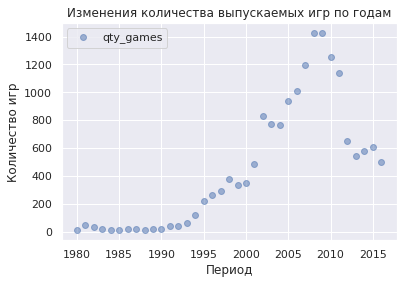

,year,qty_games
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


In [16]:
#Перекрасим фон графиков в серый
sns.set(style="darkgrid")

#Посчитаем сколько игр выпускалось в разные годы
quantity_game_per_year = df.year_of_release.value_counts().reset_index() \
    .rename(columns={'index': 'year', 'year_of_release': 'qty_games'})

#Посмотрим на динамику выпуска игр по годам
quantity_game_per_year.plot(y='qty_games', x='year', style='o', alpha=0.5, grid=True)

#Добавила названия графика и осей
plt.xlabel("Период")
plt.ylabel("Количество игр")
plt.title('Изменения количества выпускаемых игр по годам')
plt.show()

quantity_game_per_year.head(10)

---------

*Количество выпускаемых игр заметно возрасло с 2001 года, бум наблюдается в 2008-2009 годах. Примечательно: количество выпускаемых игр начало падать с 2011 года, вплоть до 2016. Для того, чтобы корректно выделить актуальный период более подробно посмотрим на данные:*

- *выделим лидеров продаж среди платформ*
- *посчитаем количество выпущенных игр и продажи этих платформ по годам*
- *построим график, обратим внимание на взаимосвязь этих показателей*
- *поищем закономерности в жизненном цикле платформ*
- *определим актуальный период для исследования*

In [17]:
#Выделим платформы с наибольшими продажами
max_sales_platform = df.pivot_table(index='platform', values='total', aggfunc='sum') \
    .sort_values(by='total', ascending=False)

max_sales_platform.head(10)

,total
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [18]:
max_sales_platform.reset_index().platform.unique()

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne',
       '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS',
       'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
#Возьмем срез данных по первым шести платформам
popular_platforms = df.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']")

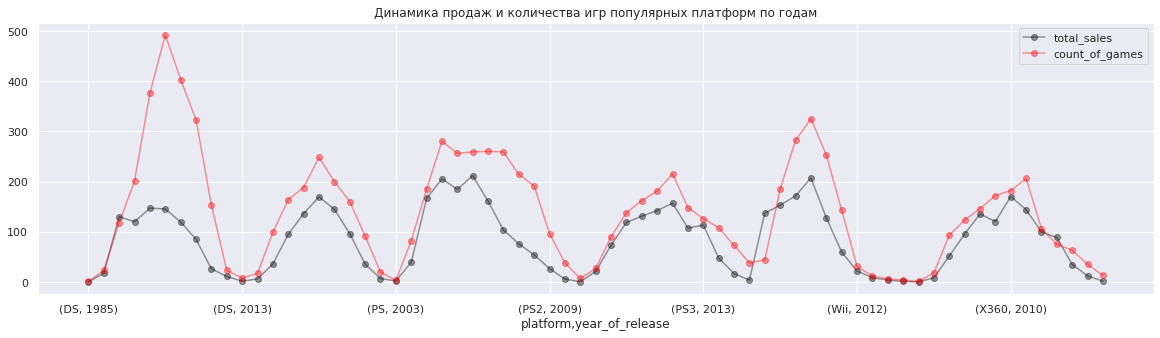

0.7915641281827359

In [20]:
#Посчитаем количество выпущенных игр и продажи этих платформ по годам
qty_sales_platform_per_year = popular_platforms \
    .groupby(['platform', 'year_of_release']) \
    .agg({'total': 'sum', 'name': 'count'}) \
    .rename(columns={'total': 'total_sales', 'name': 'count_of_games'})

#Построим график 
qty_sales_platform_per_year.plot(
    style='-o', 
    figsize=(20,5), 
    grid=True, 
    alpha=0.4, 
    color=['black', 'red'], 
    title='Динамика продаж и количества игр популярных платформ по годам')

plt.show()

#Посмотрим на корреляцию
qty_sales_platform_per_year['total_sales'].corr(qty_sales_platform_per_year['count_of_games'])

----
*По количесту игр мы выделили **6 лидеров продаж** среди платформ. В среднем, пик продаж каждой из платформ приходится на пик по количеству выпущенных ими игр, что подтверждает рассчитанный коэффициент Пирсона.*

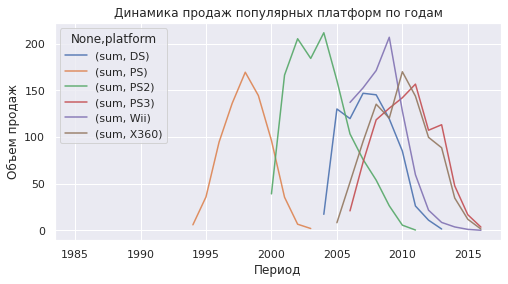

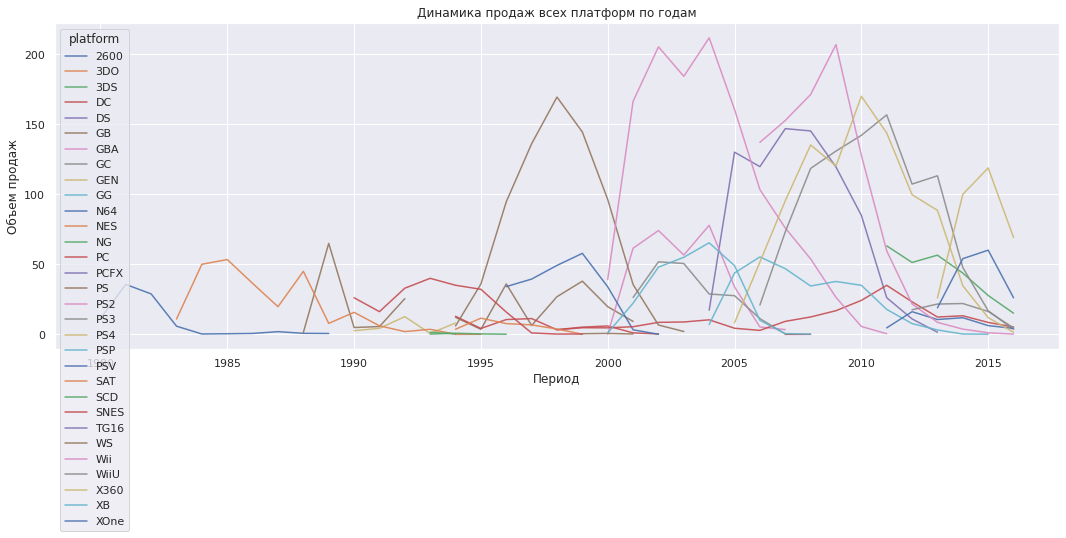

In [21]:
#Построим график 'Динамика продаж популярных платформ по годам'
(popular_platforms
 .pivot_table(index=['year_of_release'], columns='platform', values='total', aggfunc=['sum']) \
 .plot(
     grid=True, 
     alpha=0.9,
     figsize=(8,4),
     title='Динамика продаж популярных платформ по годам'))

#Добавила название осей
plt.xlabel("Период")
plt.ylabel("Объем продаж")
plt.show()

#Построим график 'Динамика продаж всех платформ по годам'
(df
 .pivot_table(index=['year_of_release'], columns='platform', values='total', aggfunc= 'sum') \
 .plot(
     grid=True, 
     alpha=0.9,
     figsize = (18, 6),
     title='Динамика продаж всех платформ по годам')
)
#Добавила название осей
plt.xlabel("Период")
plt.ylabel("Объем продаж")
plt.show()

---

*На графике 'Динамика продаж популярных платформ по годам' мы видим, что каждая из платформ имеет выраженный цикл, в среднем 10 лет. Выбирая актуальный период для исследования, необходимо учитывать жизненный цикл платформ. Наиболее информативный для нас период с **2013 - 2016 год**, см график 'Динамика продаж всех платформ по годам'. Три из самых популярных платформ на этом отрезке имеют нисходящий тренд. Остальные на отрезке 2015-2016 после пика резко идут вниз, хотя продажи этих платформ росли. Это может происходить из-за того, что данные за 2016 год неполные. Предположительно, эти платформы только в начале пути, у таких - тренд будет восходящим.*

In [22]:
#Возьмем срез данных за период 2013-2016
df_actual = df.query('year_of_release >= 2013')

In [23]:
#Платформы лидирующие по продажам
df_actual.pivot_table(index='platform', values='total', aggfunc='sum').sort_values(by='total', ascending=False)

,total
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


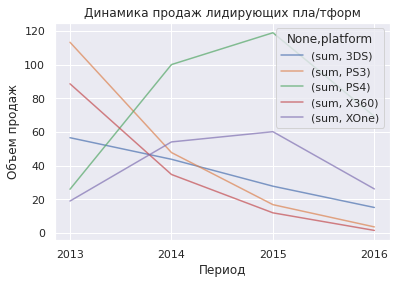

In [24]:
#Посмотрим на распределение продаж лидиющих платформ
lead_platforms = df_actual.query("platform in ['PS4', 'PS3', 'XOne', '3DS', 'X360']")
lead_platforms.pivot_table(index=['year_of_release'], columns='platform', values='total', aggfunc=['sum']) \
 .plot(
     grid=True, 
     alpha=0.7,
     figsize = (6, 4), title='Динамика продаж лидирующих пла/тформ')

plt.xticks(range(2013, 2017, 1))
#Добавила название осей
plt.xlabel("Период")
plt.ylabel("Объем продаж")
plt.show()

------
*PS4, PS3, XOne, 3DS, X360 - платформы, лидирующие по продажам. Из них PS3, X360, 3DS имеют нисходящую тенденцию, **PS4, XOne** - считаю потенциально прибыльными.*

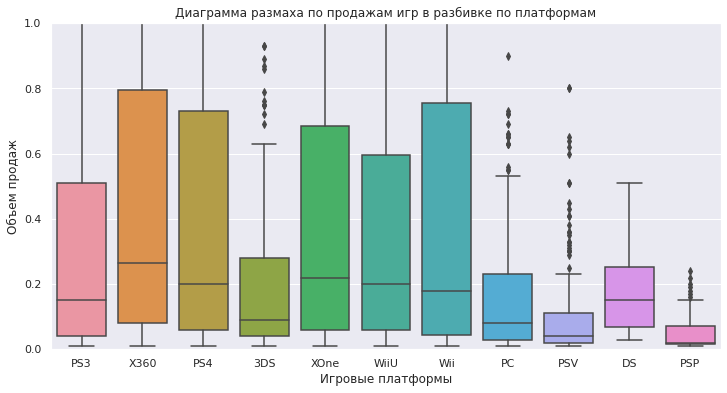

In [25]:
#Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(12,6))

sns.boxplot(x='platform', y='total', data=df_actual)
plt.ylim(0,1)

plt.title('Диаграмма размаха по продажам игр в разбивке по платформам')
#Добавила название осей
plt.xlabel("Игровые платформы")
plt.ylabel("Объем продаж")
plt.show()

In [26]:
#По выбросам можно посмотреть культовые игры, которые принесли мах доход платформе
df.query('platform == "PS4" and total > 9').sort_values(by='total', ascending=False).name.unique()

array(['Call of Duty: Black Ops 3', 'Grand Theft Auto V'], dtype=object)

---

*Построив диаграмму размаха по продажам для каждой платформы, мы видим какой разброс значений по глобальным продажам каждой из игр отдельной платформы за период с 2013 г. по 2016 г. включительно. По диаграмме видно, что у многих платформ есть существенные выбросы. По таким выбросам можно отследить культовые игры платформ, которые принесли мах результаты по продажам. Примечательно, **медиана более крупных платформ не превышвет 300 тыс**.* 

---

*Выделим одну популярную платформу. Критериями для отбора популярной платформы будут: высокие оценки пользователей и критиков, безусловно и продажи. Далее посмотрим, как влияют на продажи оценки пользователей и критиков. Построим графики и посчитаем корреляцию.*

In [27]:
(df_actual
 .groupby('platform')
 .agg({'user_score':'median', 'critic_score': 'median', 'total':'sum'}) \
 .sort_values(by=['total','critic_score','user_score'], ascending=False)
)

,user_score,critic_score,total
platform,,,
PS4,7.00,73.0,314.14
PS3,6.90,73.0,181.43
XOne,6.80,76.0,159.32
3DS,7.30,69.0,143.25
X360,6.20,74.0,136.80
WiiU,7.30,73.5,64.63
PC,6.80,77.0,39.43
PSV,7.80,72.0,32.99
Wii,4.30,NaN,13.66


*Платформа **'PS4'** имеет один из самых высоких рейтингов среди пользователей и критиков одновременно, а также лидирует по продажам игр. Посмотрим, как влияют эти оценки на продажи данной платформы.*

---
*Из-за пропусков в данных (столбцы 'user_score', 'critic_score'), коэфициент Пирсона может быть вычислен некорректно, поэтому избавимся от строк с пропусками.*

In [28]:
#Избавимся от пропусков
df_actual_without_na = df_actual.dropna()
#Возьмем срез данных только по популярной платформе
PS4_platform = df_actual_without_na.query('platform == "PS4"')

-0.03088781296873357

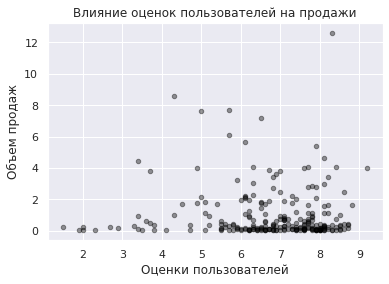

In [29]:
#Построим диаграмму рассеяния продажи-отзывы пользователей
PS4_platform.plot(
    kind='scatter', 
    y='total', 
    x='user_score', 
    color="black", 
    style = 'o', 
    alpha = 0.4, 
    title='Влияние оценок пользователей на продажи')

#Добавила название осей
plt.xlabel("Оценки пользователей")
plt.ylabel("Объем продаж")

#Посмотрим на корреляцию продажи-отзывы пользователей
PS4_platform['total'].corr(PS4_platform['user_score'])

0.40357291073577817

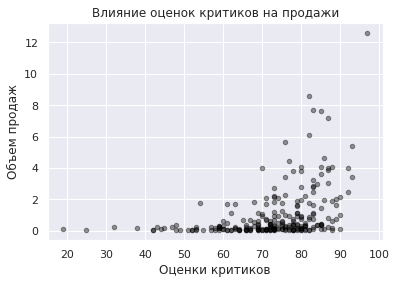

In [30]:
#Построим диаграмму рассеяния продажи-отзывы критиков
PS4_platform.plot(
    kind='scatter', 
    y='total', 
    x='critic_score', 
    color="black", 
    style = 'o', 
    alpha = 0.4, 
    title='Влияние оценок критиков на продажи')

#Добавила название осей
plt.xlabel("Оценки критиков")
plt.ylabel("Объем продаж")

#Посмотрим на корреляцию продажи-отзывы критиков
PS4_platform['total'].corr(PS4_platform['critic_score'])

-----

*Связь между оценками критиков и продажами платформы PS4 **прослеживается, но выражена незначительно**. Связь между оценками пользователей и продажами отсутствует, значения коэффициента Пирсона минимальны.*


-----

*Посмотрим как обстоят дела с остальными платформами. Посчитаем корреляцию продажи - оценки пользователей и продажи - оценки критиков по всем платформам. Для удобства занесем данные в таблицу.*

In [31]:
#Список платформ
df_actual_without_na.platform.unique()

array(['PS3', 'X360', 'PS4', 'WiiU', 'XOne', '3DS', 'PC', 'PSV', 'PSP'],
      dtype=object)

In [32]:
#Соберем данные по всем платформам, кроме PSP (там всего одна строка)
platform_list = ['PS3', 'X360', 'PS4', 'WiiU', 'XOne', '3DS', 'PC', 'PSV']
user_corr_list = []
critic_corr_list = []

for i in platform_list:
    unique_platform = df_actual_without_na[df_actual_without_na.platform == i]
    user_corr = round(unique_platform['total'].corr(unique_platform['user_score']), 3)
    user_corr_list.append(user_corr)
    critic_corr = round(unique_platform['total'].corr(unique_platform['critic_score']), 3)
    critic_corr_list.append(critic_corr)
        
#Посмотрим, что получилось
user_corr_list, critic_corr_list

([0.026, -0.0, -0.031, 0.409, -0.076, 0.273, -0.085, 0.265],
 [0.334, 0.355, 0.404, 0.38, 0.41, 0.339, 0.177, 0.254])

In [33]:
#Пропуски заполним нулями
platform_sales_score_corr = pd.DataFrame(
    {
        'platform_name': ['PS3', 'X360', 'PS4', 'WiiU', 'XOne', '3DS', 'PC', 'PSV'],
        'user_sales_corr': [0.026, -0.0, -0.031, 0.409, -0.076, 0.273, -0.085, 0.265],
        'critic_sales_corr': [0.334, 0.355, 0.404, 0.38, 0.41, 0.339, 0.177, 0.254]
    }
)

#Посмотрим что получилось
platform_sales_score_corr

,platform_name,user_sales_corr,critic_sales_corr
0,PS3,0.026,0.334
1,X360,-0.000,0.355
2,PS4,-0.031,0.404
3,WiiU,0.409,0.380
4,XOne,-0.076,0.410
5,3DS,0.273,0.339
6,PC,-0.085,0.177
7,PSV,0.265,0.254


---
 
*Связи между оценками критиков и продажами прослеживаются у всех платформ. Коэффициента Пирсона принимает значения от 0.18 - 0.41. Связь между оценками пользователей и продажами отсутствует в большинстве случаев, однако у некоторых платформ связь тоже есть - WiiU, PSV, 3DS.*

-----

*Построим сводную таблицу по жанрам. Посмотрим на распределение продаж и на количество игр для соответствующих жанров.*

In [34]:
game_genre = df_actual.pivot_table(index='genre', values='total', aggfunc=['count', 'sum', 'median']) #добавила медиану в расчеты
game_genre.columns = ['game_qty', 'total_sales', 'median_sale']

game_genre.sort_values(by='median_sale', ascending=False).style.background_gradient('coolwarm') #сортировка по медиане

,game_qty,total_sales,median_sale
genre,,,
Shooter,187,232.980000,0.450000
Sports,214,150.650000,0.240000
Platform,74,42.630000,0.225000
Role-Playing,292,145.890000,0.125000
Fighting,80,35.310000,0.125000
Racing,85,39.890000,0.120000
Action,766,321.870000,0.110000
Simulation,62,21.760000,0.100000
Misc,155,62.820000,0.100000


---

*Несмотря на лидирующие показатели по количеству игр и общим продажам жанра <b>'Action'</b> , самым прибыльным жанром стал <b>'Shooter'</b> . В среднем за игры этого жанра готовы платить в 4 раза больше, чем за игры того же <b> 'Action'</b>. Низкоприбыльными жанрами из всех стали <b> Adventure, Puzzle </b>.*

---

**Вывод**

-----

*Активный рост игровой индустрии произошел в 2001 году, появилось больше платфор и как следствие игр. Для изучения и построения гипотез нам будет достаточно периода 2013 - 2016 г. Данные за этот период содержат информацию по растущим, потенциально прибыльным, и уже исчезающим платформам. Выборка для изучения будет взята только за актуальный период.*

*Исследовательский анализ показал, что при планировании необходимо учитывать следующие факторы:*
1. *Жизненный цикл игровой платформы. В среднем продолжительность жизни составляет 10 лет, поэтому необходимо понимать на каком этапе существования платформы проводится рекламная кампания.*
2. *Глобальные продажи игр по платформам смогут дать представление о возможных результатах от кампании.*
3. *Обращать внимание на оценки критиков, они могут незначительно, но исказать результаты продаж.*
4. *Жанры игр влият напрямую на продажи, потому как есть наиболее прибыльные жанры, которые уже завоевали любовь аудитории.* 

---

## 3 этап. Формирование портрета пользователя по каждому региону

**Задачи**

-----
Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5)
- самые популярные жанры (топ-5)
- слияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
#Найдем самые популярные платформы по регионам
(df_actual
 .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .style.background_gradient('coolwarm')
)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.960000,67.810000,38.200000
DS,0.850000,0.000000,0.570000
PC,25.360000,0.000000,11.110000
PS3,67.810000,23.350000,63.500000
PS4,141.090000,15.960000,108.740000
PSP,0.170000,3.290000,0.000000
PSV,6.100000,18.590000,5.040000
Wii,5.930000,0.050000,6.560000
WiiU,19.850000,10.880000,29.210000


-----
*Самые популярные платформы по регионам:*
- *для Европы: PS4, PS3, XOne, X360, 3DS*
- *для Японии: 3DS, PS3, PSV, PS4, WiiU*
- *для Северной Америки: PS4, XOne, X360, PS3, 3DS*
-----

In [36]:
#Найдем самые популярные жанры по регионам
(df_actual
 .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .style.background_gradient('coolwarm')
)

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.130000,40.490000,126.050000
Adventure,8.250000,5.820000,7.140000
Fighting,8.550000,7.650000,15.550000
Misc,20.040000,9.200000,27.490000
Platform,15.580000,4.790000,18.140000
Puzzle,1.000000,1.180000,0.830000
Racing,20.190000,2.300000,12.960000
Role-Playing,36.970000,51.040000,46.400000
Shooter,87.860000,6.610000,109.740000


-----
*Самые популярные жанры по регионам:*
- *для Европы: Action, Shooter, Sports, Role-Playing, Racing*
- *для Японии: Role-Playing, Action, Misc*
- *для Северной Америки: Action, Shooter, Sports, Role-Playing, Misc*
---

In [37]:
#Заполним пропуски в rating
df_actual_rating = df_actual.fillna('no_category') #вместо удаления, заполнила пропуски

#Постороим сводную таблицу по продажам в регионах на основании рейтинга ESRB
rating_data = df_actual_rating \
.pivot_table(index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

rating_data.style.background_gradient('coolwarm')

,eu_sales,jp_sales,na_sales
rating,,,
E,83.360000,15.140000,79.050000
E10+,42.690000,5.890000,54.240000
M,145.320000,14.110000,165.210000
T,41.950000,20.590000,49.790000
no_category,78.910000,85.050000,89.420000


In [38]:
#Посчитаем долю пропусков по отдельным регионам
eu_sales_na_ratio = round(78.91 / sum(df_actual['eu_sales']) * 100, 2)
jp_sales_na_ratio = round(85.05 / sum(df_actual['jp_sales']) * 100, 2)
na_sales_na_ratio = round(89.42 / sum(df_actual['na_sales']) * 100, 2)

display('Доля пропусков по Европе: {}, по Японии: {}, по Северной Америке: {}'.format(eu_sales_na_ratio, jp_sales_na_ratio, na_sales_na_ratio))

'Доля пропусков по Европе: 20.12, по Японии: 60.41, по Северной Америке: 20.43'

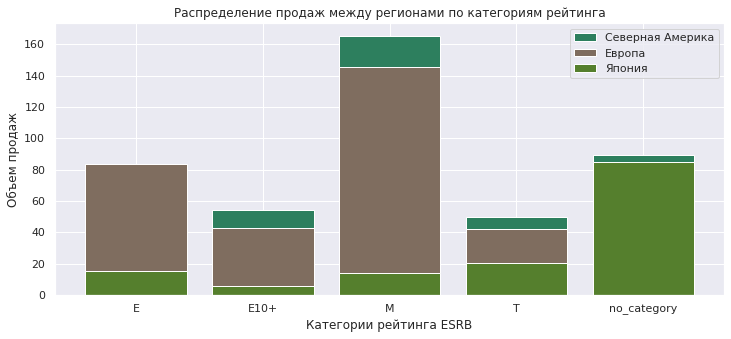

In [39]:
from matplotlib import rc
plt.figure(figsize=(12,5))

#Значения на оси х
names = ['E','E10+','M','T', 'no_category']

#Распределение по Северной Америке
plt.bar(rating_data.index, rating_data['na_sales'], color='#2d7f5e', edgecolor='white', label='Северная Америка') #зеленый
#Распределение по Европе
plt.bar(rating_data.index, rating_data['eu_sales'], color='#7f6d5f', edgecolor='white', label='Европа') #коричневый
#Распределение по Японии
plt.bar(rating_data.index, rating_data['jp_sales'], color='#557f2d', edgecolor='white', label='Япония') #салатовый

plt.legend()
#Добавила названия графика и осей
plt.xlabel("Категории рейтинга ESRB")
plt.ylabel("Объем продаж")
plt.title('Распределение продаж между регионами по категориям рейтинга')
plt.show()

---

*По Европе и Северной Америке мы наблюдаем схожую картину, большая доля продаж принадлежит играм для взрослых - категория M . В Японии люди больше покупают игры для подростков - категория T. Однако, судя по доли пропусков, которая составляет 60%, картина может поменяться. Необходимо изучить данный факт при выгрузке данных, либо обратиться к другим открытым источникам, где будет полная информация по рейтингам данного региона.*


---

- E - Everyone — для всех
- E10+ - Everyone 10 and older — для всех от 10 лет и старше
- M - Mature — для взрослых
- T - Teen — для всех от 13 лет и старше

**Вывод**

---

*Типичный пользователь в Северной Америке предпочитает игры следующий платформ: PS4, XOne, X360, PS3, 3DS. Как правило, жанр игры: Action, Shooter, Sports, Role-Playing, Misc, а категория - для взрослых(М).*

*Типичный пользователь в Европе предпочитает игры следующий платформ: PS4, PS3, XOne, X360, 3DS. Как правило, жанр игры: Action, Shooter, Sports, Role-Playing, Racing, а категория - для взрослых(М).*


*Типичный пользователь в Японии предпочитает игры следующий платформ: 3DS, PS3, PSV, PS4, WiiU. Как правило жанр игры: ARole-Playing, Action, Misc, а категория - для подростков(Т).*

--------
*Вышесказанное еще раз доказывает, что при планировании рекламной кампании необходимо учитывать регион и особенности аудитории этого региона.* 

## 4 этап. Проверка гипотез

**Проверка первой гипотезы:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

```
H_0: Средний пользовательский рейтинг платформы Xbox One = Средний пользовательский рейтинг платформы PC`
H_a: Средний пользовательский рейтинг платформы Xbox One ≠ Средний пользовательский рейтинг платформы PC`
alpha = 0.01
```

In [40]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df_actual.query('platform == "XOne"').user_score,
    df_actual.query('platform == "PC"').user_score,
    equal_var=False, 
    nan_policy = 'omit')                              

# alpha = задайте значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


---

*Пороговое значение было выбрано - 5%.*

*В данном случае мы имеем дело с двустровонней гипотезой (нулевой и альтернативной двустровонней). Выясняя, могут ли совокупности быть одинаковыми, принимает Н_0: «они одинаковые, исследуемые параметры равны». Таким образом, мы берем утверждение о равенстве, - это будет нулевая гипотеза, которую мы хотим проверить, а алтернативная - утверждение, что средние пользовательские рейтинги платформ Xbox One и PC разные.*

*Метод для исследования scipy.stats.ttest_ind (array1, array2, equal_var). Данный метод используется для проверки гипотезы о равенстве среднего двух совокупностей в Python. Все условия для проведения t-теста соблюдаются:*
- *выборки независимые*
- *изменения в выборка не происходят во время исследования*
- *выборочные средние нормально распределены (данных в вывборках достаточно)*

---

**Проверка второй гипотезы:** Средние пользовательские рейтинги жанров Action и Sports разные.

```
H_0: Средний пользовательский рейтинг жанра Action = Средний пользовательский рейтинг жанра Sports`
H_a: Средний пользовательский рейтинг жанра Action ≠ Средний пользовательский рейтинг жанра Sports`
alpha = 0.01
```

In [41]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df_actual_without_na.query('genre == "Action"').user_score,
    df_actual_without_na.query('genre == "Sports"').user_score,
    equal_var=False)

# alpha = задайте значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

7.136312729062867e-13
Отвергаем нулевую гипотезу


---
*Пороговое значение было выбрано - 5%.* 

*Исследование построено на нулевой и альтернативной двустровонней гипотезах. Выясняя, различны две совокупности или нет, принимает Н_0: «они одинаковые, исследуемые параметры равны». Таким образом, мы берем противоположное утверждение - это будет нулевая гипотеза, а алтернативная - утверждение, которые мы хотим проверить, а именно различны ли средние пользовательские рейтинги жанров Action и Sports.*

*Метод для исследования scipy.stats.ttest_ind (array1, array2, equal_var). Данный метод используется для проверки гипотезы о равенстве среднего двух совокупностей в Python. Все условия для проведения t-теста соблюдаются:*
- *выборки независимые*
- *изменения в выборка не происходят во время исследования*
- *выборочные средние нормально распределены (данных в вывборках достаточно)*

---

**Вывод**

---

*Полученное р-значение 14% по первой гипотезе не дает нам право отвергнуть нулевую гипотезу. Значит мы можем допустить, что средние пользовательские рейтинги платформ Xbox One и PC могут быть равны.*

*На основании полученного р-значения менее 1% по второй гипотезе, мы можем допустить, что средние пользовательские рейтинги жанров Action и Sports действительно могут быть различны. В дальнейшем мы сможем проверить какие значения больше, а какие меньше, так же с помощью гипотез: нулевой и альтернативной односторонней.*

---

## Вывод по исследованию 

*В ходе исследования мы провели подготовку данных к исследованию. Для удобства и во избежании ошибок привели названия столбцов к нижнему регистру. Нашли неточности в типах данных, исправили их. Избавились от незначительных пропусков и анамалий в данных. К сожалению, большая часть данных, практически половина, по оценкам пользователей, критиков и рейтингам отсутствовала. Заполнение пропусков, могло исказить исследование, поэтому они остались пустыми.*



*Предварительно мы обратились к динамике игр по годам. Интересующие нас данные совпали с расцветом индустрии игр - 2001 год. Проанализировали платформы, лидирующие по количеству продаж и выяснили, жизненный цикл платформ составляет в среднем 10 лет. Эта важная закономерность, при планирование рекламной кампании. Компании необходимо точно знать на каком этапе сейчас платформа, чтобы оценить целесообразность проведения кампаний и сделать корректные прогнозы.*

*Для исследования мы не могли взять период в 10 лет, за это время платформы в принципе могли прекратить существование, поэтому было принято решение взять следующий актуальный период для исследования: 2013-2016 года. Данный отрезок включает платформы, которые находятся как в начале пути, так и угасают. Выявлены потенциально прибыльные платформы: PS4, XOne. Изучив распределение глобальных продаж игр отдельных платфор, мы увидели средние значения по продажам, они не превышают 300 тыс. Разброс в значениях большой, выбросы - это результаты культовых игр, которые принесли платформам не только прибыль, но и сделали их популярными, что также повлияло на их средние результаты по остальным играм. Проанализировав взаимосвязь оценок пользователей, критиков и продаж, мы пришли к выводу: влияние оценок пользователей на продажи ничтожно мало, а вот оценки критиков могут повлиять, но незначительно. В процессе изучения жанров был выявлен самый прибыльный - 'Shooter', низкоприбыльными стали - 'Adventure', 'Puzzle'.*


*Для проведения рекламной кампании, необходим портрет пользователя. Предположения, что портрет пользователя по регионам будет отличатся, подтвердилось:*


*Типичный пользователь в Северной Америке предпочитает игры следующий платформ: PS4, XOne, X360, PS3, 3DS. Как правило, жанр игры: Action, Shooter, Sports, Role-Playing, Misc, а категория - для взрослых(М)*


*Типичный пользователь в Европе предпочитает игры следующий платформ: PS4, PS3, XOne, X360, 3DS. Как правило, жанр игры: Action, Shooter, Sports, Role-Playing, Racing, а категория - для взрослых(М).*


*Типичный пользователь в Японии предпочитает игры следующий платформ: 3DS, PS3, PSV, PS4, WiiU. Как правило жанр игры: ARole-Playing, Action, Misc, а категория - для подростков(Т). По данному региону, в вопросе предпочтений категории игр, необходимо провести дополнительные исследования. Большая часть данных отсутствует, выводы могут быть неточными.*

*Мы проверили две гипотезы. В результате, по первой - вполне возможно допустить, что средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми. По второй гипотезе - мы можем допустить, что средние пользовательские рейтинги жанров Action и Sports действительно могут быть различны. В дальнейшем мы сможем проверить какие значения больше, а какие меньше, так же с помощью гипотез: нулевой и альтернативной односторонней, при необходимости.*

*Закономерности, выявленные во время исследования, должны быть учтены при выборе продукта и планировании для него рекламной кампании.*